Single Tee

In [1]:
from microfluidics_ipkiss3.technology import * #comment when running main script, uncomment to debug geometry
from ipkiss3 import all as i3
import microfluidics_ipkiss3.all as microfluidics

import math
# This script contains two classes.
# Class 1:  TeeSimple: overlapping geometries
# Class 2: TeeBoolean: adding geometries with boolean operation

class TeeSimple(i3.PCell):
    """A generic Tee to connect elements. It is defined by a boundary which are defined by points
    """
    channel_template = microfluidics.ChannelTemplateProperty(default=microfluidics.ShortChannelTemplate(), doc="Channel template of the tee")
    _name_prefix = "Tee" # a prefix added to the unique identifier
    TECH = i3.get_technology()

    class Layout(i3.LayoutView):

        tee_length = i3.NumberProperty(default=10.0, doc="length of each tee branch")

        def _generate_instances(self, elems):# insts):
            channel1 = microfluidics.Channel(trace_template = self.cell.channel_template)
            channel1_lo = channel1.Layout(shape=i3.Shape([(0, -self.tee_length), (0, self.tee_length)]))
            elems += i3.SRef(channel1, position=(0, 0))

            channel2 = microfluidics.Channel(trace_template=self.cell.channel_template)
            channel2_lo = channel2.Layout(shape=[(0, 0), (-self.tee_length, 0)])
            elems += i3.SRef(channel2, position=(self.tee_length, 0))

            return elems #insts

        def _generate_ports(self, ports):
            #port1
            ports += microfluidics.FluidicPort(name='in1',
                                               position = (0, -self.tee_length),
                                               direction = i3.PORT_DIRECTION.IN,
                                               angle_deg=270,
                                               trace_template=self.cell.channel_template
                                               )
            #port2
            ports += microfluidics.FluidicPort(name='in2',
                                               position = (0, self.tee_length),
                                               direction = i3.PORT_DIRECTION.IN,
                                               angle_deg=90,
                                               trace_template=self.cell.channel_template
                                               )
            #port3
            ports += microfluidics.FluidicPort(name='out1',
                                               position = (self.tee_length, 0.0),
                                               direction = i3.PORT_DIRECTION.OUT,
                                               angle_deg=0,
                                               trace_template=self.cell.channel_template
                                               )
            return ports

class TeeBoolean(i3.PCell):
    """A generic Tee to connect elements. It is defined by a boundary which are defined by points
    """
    channel_template = microfluidics.ChannelTemplateProperty(default=microfluidics.ShortChannelTemplate(), doc="Channel template of the tee")
    _name_prefix = "TeeBoolean" # a prefix added to the unique identifier

    class Layout(i3.LayoutView):
        tee_length = i3.NumberProperty(default=10.0, doc="length of each tee branch")

        def _generate_elements(self, elems):# insts):


            rectangle = i3.RoundedRectangle(layer=i3.TECH.PPLAYER.CH2.TRENCH, center=(0.0, 0.0), box_size=(self.tee_length,2*self.tee_length), radius=1.0)
            rectangle2 = i3.RoundedRectangle(layer=i3.TECH.PPLAYER.CH2.TRENCH, center=(0.5*self.tee_length, 0.0), box_size=(self.tee_length,self.tee_length), radius=1.0)
            #boolean operation add main trap and 1st rectangle
            b_add =  rectangle  | rectangle2
            s= i3.Structure(elements = b_add)
            elems += i3.SRef(s)

            return elems #insts

        def _generate_ports(self, ports):
            #port1
            ports += microfluidics.FluidicPort(name='in1',
                                               position = (0, -self.tee_length),
                                               direction = i3.PORT_DIRECTION.IN,
                                               angle_deg=270,
                                               trace_template=self.cell.channel_template
                                               )
            #port2
            ports += microfluidics.FluidicPort(name='in2',
                                               position = (0, self.tee_length),
                                               direction = i3.PORT_DIRECTION.IN,
                                               angle_deg=90,
                                               trace_template=self.cell.channel_template
                                               )
            #port3
            ports += microfluidics.FluidicPort(name='out1',
                                               position = (self.tee_length, 0.0),
                                               direction = i3.PORT_DIRECTION.OUT,
                                               angle_deg=0,
                                               trace_template=self.cell.channel_template
                                               )
            return ports

class TeePoints(i3.PCell):
    """A generic Tee to connect elements. It is defined by a boundary which are defined by points
    """
    channel_template = microfluidics.ChannelTemplateProperty(default=microfluidics.ShortChannelTemplate(), doc="Channel template of the tee")
    _name_prefix = "TeePoints" # a prefix added to the unique identifier
    TECH = i3.get_technology()
    class Layout(i3.LayoutView):

        tee_length = i3.NumberProperty(default=10.0, doc="length of each tee branch")
        radius_fillet = i3.NumberProperty(default=65, doc="length of each tee branch")

        def _generate_elements(self, insts):
            #print 'self.cell.channel_template', self.cell.channel_template.Layout.channel_width

            point_list = []
            point_list.append((-self.tee_length, -self.tee_length))
            point_list.insert(0, (-self.tee_length, self.tee_length))

            point_list.append((0, -self.tee_length))
            point_list.insert(0, (0, self.tee_length))


            point_list.append((self.tee_length*0.0, -self.tee_length*0.5))
            point_list.insert(0, (self.tee_length*0.0, self.tee_length*0.5))

            point_list.append((self.tee_length, -self.tee_length*0.5))
            point_list.insert(0, (self.tee_length, self.tee_length*0.5))


            print point_list
            t = i3.Shape(point_list, closed=True)
            bo2 = i3.Boundary(i3.TECH.PPLAYER.CH2.TRENCH, t)

            #rectang = i3.ShapeRound(original_shape=t, start_face_angle=0, end_face_angle=0, radius=self.radius_fillet)
            #bo2 = i3.Boundary(i3.TECH.PPLAYER.CH2.TRENCH, bo2)

            s2 = i3.Structure(elements=bo2)
            insts += bo2

            return  insts

        def _generate_ports(self, ports):
            #port1
            ports += microfluidics.FluidicPort(name='in1',
                                               position = (-self.tee_length*0.5, -self.tee_length),
                                               direction = i3.PORT_DIRECTION.IN,
                                               angle_deg=270,
                                               trace_template=self.cell.channel_template
                                               )
            #port2
            ports += microfluidics.FluidicPort(name='in2',
                                               position = (-self.tee_length*0.5, self.tee_length),
                                               direction = i3.PORT_DIRECTION.IN,
                                               angle_deg=90,
                                               trace_template=self.cell.channel_template
                                               )
            #port3
            ports += microfluidics.FluidicPort(name='out1',
                                               position = (self.tee_length, 0.0),
                                               direction = i3.PORT_DIRECTION.IN,
                                               angle_deg=0,
                                               trace_template=self.cell.channel_template
                                               )
            return ports

if __name__ == "__main__":
    print "This is not the main file. Run 'execute.py' in the same folder"
    '''tee = TeeSimple()
    tee_layout= tee.Layout(tee_length=100)
    tee_layout.visualize(annotate = True)
    tee_layout.visualize_2d()'''


    #tee = TeePointsBoolean()  #TeeBoolean()#
    tee = TeeSimple()
    tee_layout= tee.Layout(tee_length=200)
    tee_layout.visualize(annotate = True)
    tee_layout.visualize_2d()




This is not the main file. Run 'execute.py' in the same folder


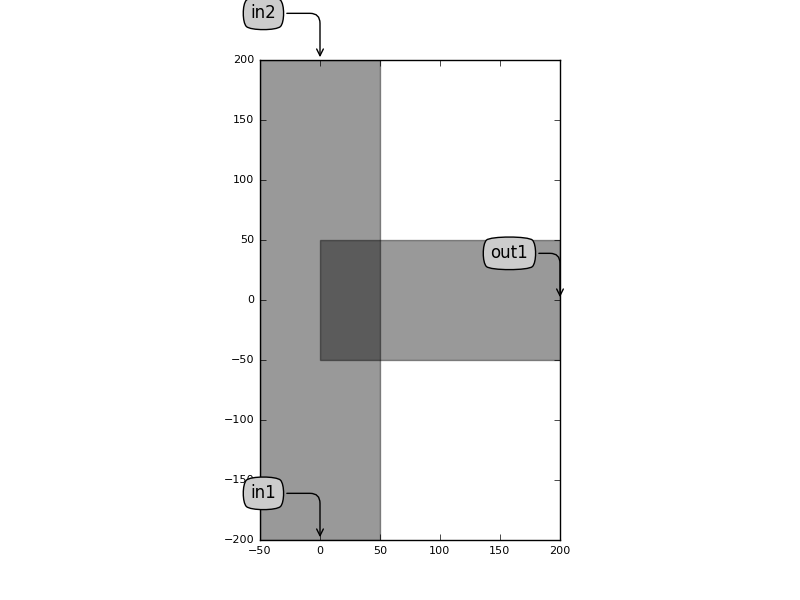

In [3]:
#Import library
from IPython.display import Image# Load image from local storage
Image(filename = "files/tee.png", width = 600, height = 300)


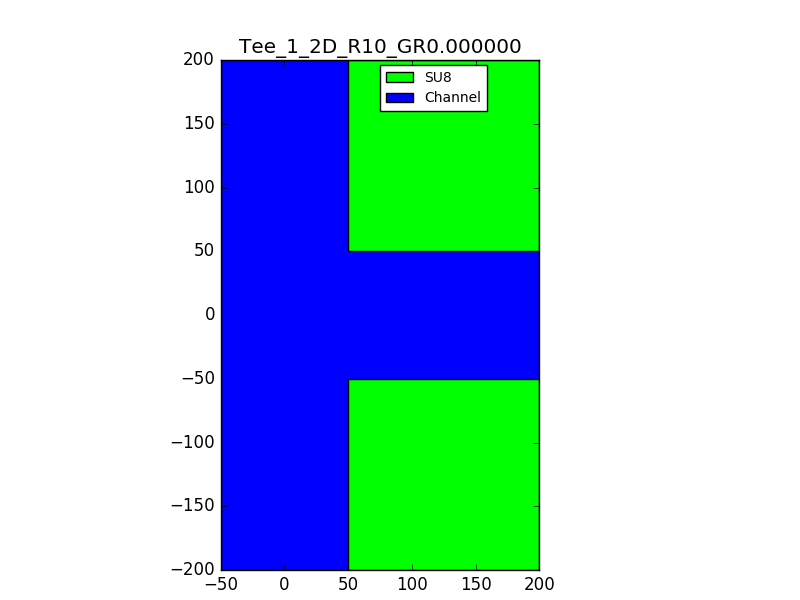

In [4]:
#Import library
from IPython.display import Image# Load image from local storage
Image(filename = "files/tee_2d.png", width = 600, height = 300)

STL generation

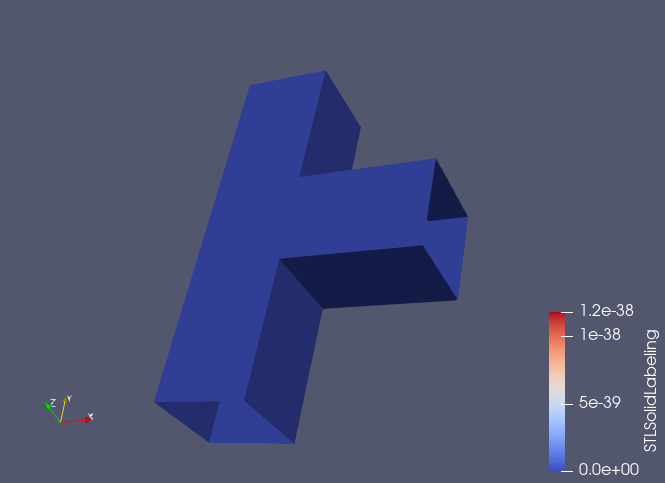

In [6]:

#Import library
from IPython.display import Image# Load image from local storage
Image(filename = "files/tee_stl.png", width = 600, height = 300)

In [5]:
    #generating STL and OF sim

    from microfluidics_ipkiss3.pysimul.openfoam.openfoam_engine import *
    from microfluidics_ipkiss3.pysimul.openfoam.turbulence_model import *
    from microfluidics_ipkiss3.pysimul.openfoam.transport_model import *

    # Control how the mesh is generated

    snap_control = SnapControl(num_smooth_patch=1)
    add_layer_control = AddLayerControl(final_layer_thickness=10, min_thickness=1, num_grow=10)
    mesh_quality_control = MeshQualityControl(max_non_orthogonal=90)
    mesh_control = MeshControl(mesh_size=20, feature_refinement_level=2,
                               surface_refinement_level=(1, 2),
                               refinement_regions=[(1, 2)],
                               snap_mesh=True, snap_control=snap_control,
                               add_layer=True, add_layer_control=add_layer_control,
                               mesh_quality_control=mesh_quality_control)

    # Transport and turbulence models

    transport_model = NewtonianModel(kinematic_viscosity=0.001 / 1050)
    turbulence_model = LaminarModel()

    # Create a list of properties required by simpleFoam solver including the transport property
    # and a list of properties returned by turbulenace model

    properties = [transport_model.get_model_property()] + turbulence_model.get_model_properties()

    # Initialise the engine with simpleFoam solver

    engine = OpenFoamEngine(mesh_control=mesh_control, solver='simpleFoam',
                            properties=properties)

    from microfluidics_ipkiss3.pysimul.runtime.basic import *

    params = dict()
    params["engine"] = engine
    params["inlets"] = [FixedVelocityInlet(in_port_number=0, velocity=(0, 50e-3, 0)),
                        FixedVelocityInlet(in_port_number=1, velocity=(0.0, -50e-3, 0.0)),
                        #FixedVelocityInlet(in_port_number=2, velocity=(0.0, 30e-3, 0.0))
                         ]


    window_si = SizeInfo(west=-260, east=260, south=-360, north=360)
    #params["window_size_info"] = window_si

    # 2D simulation
    params["dimensions"] = 3

    # Create and run simulation

    from ipkiss.plugins.simulation import *

    simul = tee_layout.create_simulation(simul_params=params)

    # Start running simulation

    simul.procedure.run(case_name='tee1', use_existing_mesh=False, interactive=True)




Finish generating mesh.

Final mesh is in tee1/constant/polyMesh

Exiting...


ERROR: Execution failed: blockMesh: [Errno 2] No such file or directory
ERROR: Execution failed: surfaceFeatureExtract: [Errno 2] No such file or directory
ERROR: Execution failed: snappyHexMesh: [Errno 2] No such file or directory


SystemExit: 0

/home/fran/anaconda2/envs/ipkiss3/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2886: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
